In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [5]:

glass_data= pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
X= glass_data.iloc[:,0:9]
Y=glass_data['Type']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {
    'knn__n_neighbors': (2,5,15, 30, 45, 64)
}

In [11]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 15,5,20,25),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [12]:
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [13]:
grid_search_KNN.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 15, 5, 20, 25), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [14]:
grid_search_KNN.best_params_,grid_search_KNN.best_score_

({'leaf_size': 20,
  'metric': 'minkowski',
  'n_neighbors': 20,
  'p': 1,
  'weights': 'distance'},
 0.6498338870431895)

In [15]:
KNN_classifier = KNeighborsClassifier(n_neighbors=20,metric='minkowski',leaf_size=20)
KNN_classifier.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=20)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,KNN_classifier.predict(X))

0.6495327102803738

In [18]:
pred_on_test_data=KNN_classifier.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score
acc_on_test_data = accuracy_score(pred_on_test_data,Y_test)
acc_on_test_data

0.7674418604651163

In [20]:
features = glass_data.columns

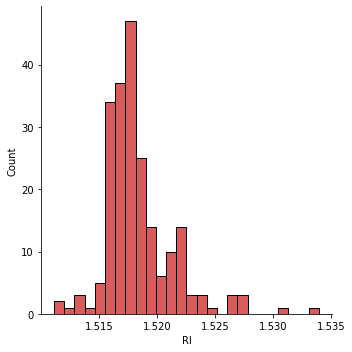

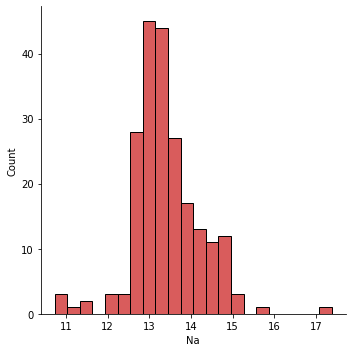

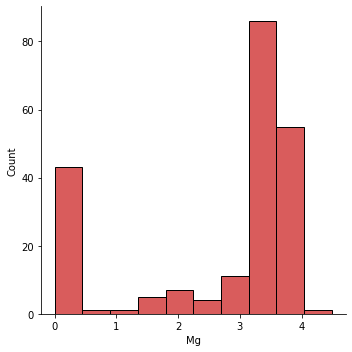

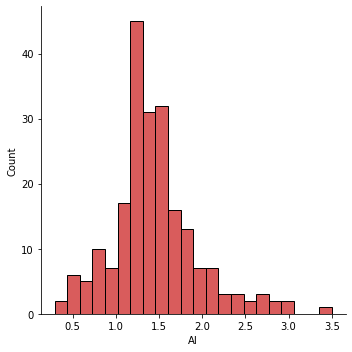

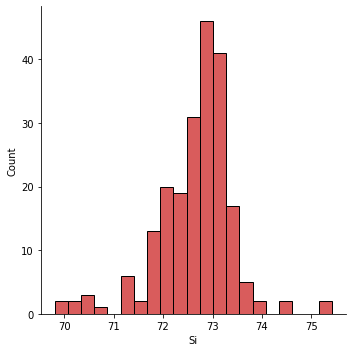

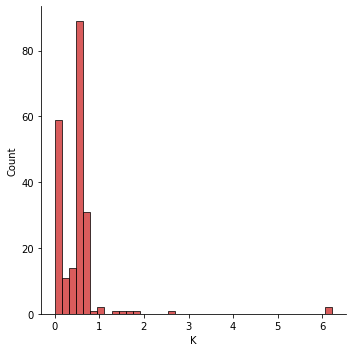

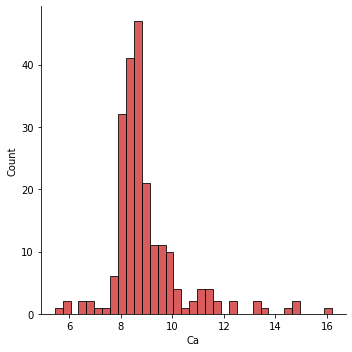

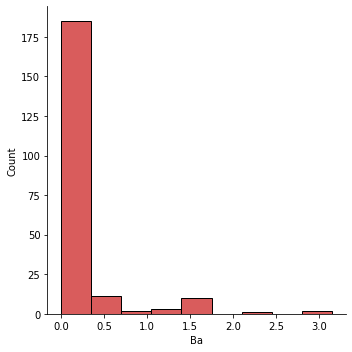

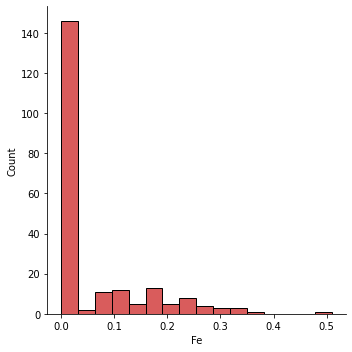

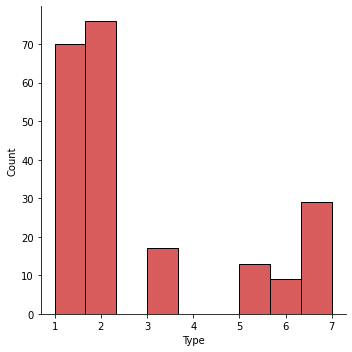

In [21]:
for i in features:
    sns.displot(x=i,data=glass_data,color='#CD2626')

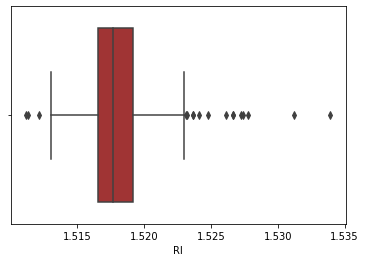

In [22]:
sns.boxplot(features[0],data=glass_data,color='#B22222');

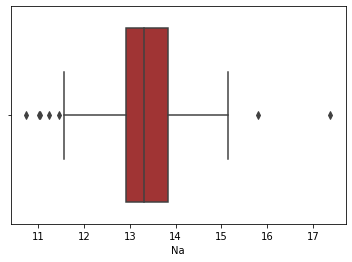

In [23]:
sns.boxplot(features[1],data=glass_data,color='#B22222');

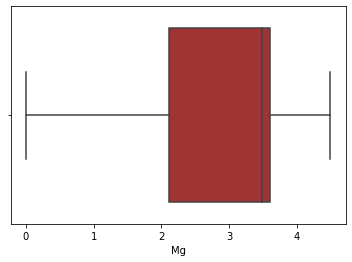

In [24]:
sns.boxplot(features[2],data=glass_data,color='#B22222');


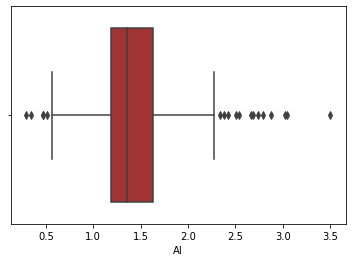

In [25]:
sns.boxplot(features[3],data=glass_data,color='#B22222');

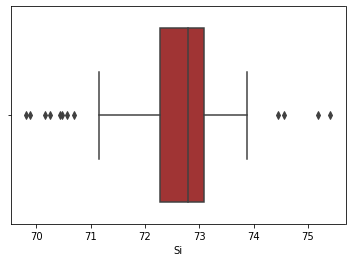

In [26]:
sns.boxplot(features[4],data=glass_data,color='#B22222');

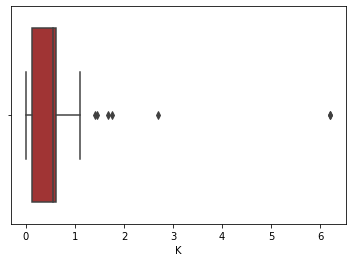

In [27]:
sns.boxplot(features[5],data=glass_data,color='#B22222');

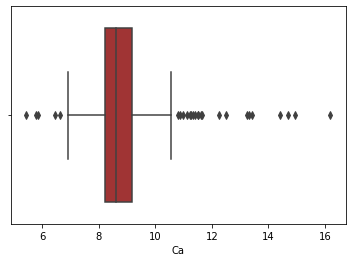

In [28]:
sns.boxplot(features[6],data=glass_data,color='#B22222');

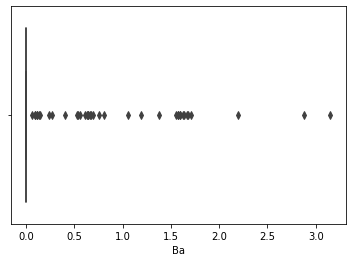

In [29]:
sns.boxplot(features[7],data=glass_data,color='#B22222');

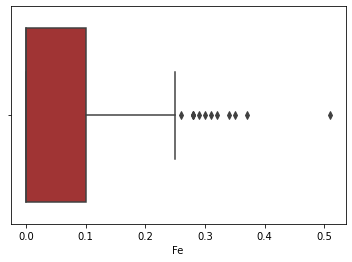

In [30]:
sns.boxplot(features[8],data=glass_data,color='#B22222');